# Image Classification using (Shallow) Machine Learning Techniques

Image classification and machine learning around images is almost always delegated to deep machine learning algorithms such as TensorFlow, MXNet or Keras.

However, machine learning algorithms can also be used to help answer these questions as well.  Having an understanding around how to apply machine learning algorithms to common problems will be an increasingly important skill to have.

**Adrian Rosebrock** - Entrepreneur and Ph.D in Computer Vision, Machine Learning and Information Retrieval.  
[PyImageSearch](https://www.pyimagesearch.com/start-here-learn-computer-vision-opencv/)

---

<font size="3"><i>
"And perhaps most importantly, in the near future, a computer scientist [Software Engineer] without at least some knowledge of AI [Artificial Intelligence], DL [Deep Learning], CV [Computer Vision] will be like an engineer without basic programming skills — <b>potentially unemployable and overlooked for new job opportunities, research grants, and projects.</b>"
    </i>    </font>
    
    
This notebook was inspired by Adrians Blog post: 

[Machine Learning in Python](https://www.pyimagesearch.com/2019/01/14/machine-learning-in-python/)

I highly recommend his blogs and tutorials.  They are well written and maintained.


# Overview

This notebook will focus on the the shallow machine learning techniques.  Another notebook will take the same input data and describe how to apply deep learning techniques.




The goals of this notebook are:

- Gentle introduction to Computer Vision and image processing

- How to look for features in data that are perhaps un-obvious at first

- How to use OpenCV to create a feature set

- Present a high level overview of a number of Scikit-Learn Machine Learning models

- Demonstrate the steps to creating a Machine Learning model

- Demonstrate how to predict using a Machine Learning Model

- Setup the next discussion on Deep Learning and Image Classification.

Goal is to extract the following image features so that we can train a supervised machine learning model to predict one of 3 different categories.

# Local Machine Setup

These instructions are somewhat high level, meaning you might have to look up how to install certain software for you particular machine - but the steps are correct.

Because this is a notebook about Computer Vision, one of the most common computer vision libraries is *OpenCV*.  You will have to install OpenCV on your machines.

## OpenCV 4.x

At the time of this writing, OpenCV 4.0.1 is released with 4.1.0 on the way.  You can find more information at:
[https://docs.opencv.org/4.0.1/](https://docs.opencv.org/4.0.1/).

It is recommended that you install the latest version for your computer.

## Python Libraries

```python
pip install numpy
pip install sklearn
pip install pandas
pip install matplotlib
```

# Image Processing Overview

This section is meant to be short, and direct to lay a foundation of the components of an image

### Image

An image is made up of a collection of pixels.  The pixel is the most fundemental building block of an image and there is no finer granularity.

A 2D image is thought of as a grid or matrix of X,Y values.  The upper left corner is considered 0,0 and the X value increase from left to right and the Y value increases from top to bottom.

For example a 500 x 300 pixel image has 500 rows and 300 columns for a total number of pixels = 500 * 300 = 150,000.

#### Grayscale and Color
Pixels are either a single value for grayscale or a tuple of 3 values for Red, Green Blue.  Each pixel intensity ranges in value from 0, black to 255 or white.

<font size="4">Assuming a color channel in the order:  Red, Green Blue</font>

A white pixel is a tuple of, (255,255,255).  A red pixel is a tuple of (255, 0, 0 )

The reason we stress the color channel order is because OpenCV stores the color change as Green, Blue, Red.  It is just how they do it and you just have to know it and work with it.  There are conversion routines built into OpenCV.

![SampleImage](notebook_images/letter_I.png)


#### Histogram

A histogram represents the distribution of pixel intensities (either grayscale or color) in an image.

![histo](notebook_images/histogram.png)




# OpenCV

Lets explore some of the operations and capabilitiles of OpenCV.  It is a very capable and powerful image library and we are just going to look at the minimum of features needed for this notebook. 


In [139]:
from matplotlib import pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [140]:
print(cv2.__version__)

4.0.1


### Read and Show an Image

In [141]:
def show_grayscale(img_path, name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(6,8))
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.show()
    
def show_rgb(img_path, name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(name)
    plt.show()


def show_bgr(img_path, name):
    img = cv2.imread(img_path)

    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(name)
    plt.show()

    

In [142]:
forest_image_path = 'test_images/forest_nat147.jpg'
highway_image_path = 'test_images/highway_urb716.jpg'


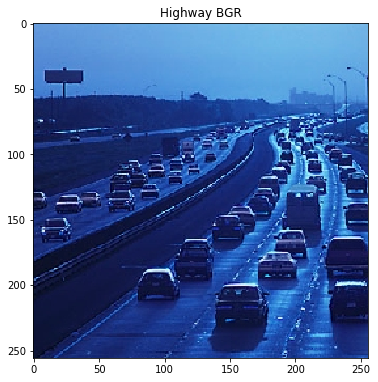

In [143]:
show_bgr(highway_image_path, 'Highway BGR')

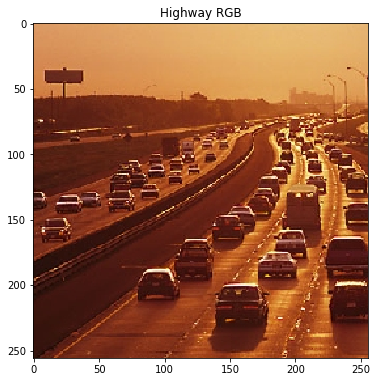

In [144]:
show_rgb(highway_image_path, 'Highway RGB')

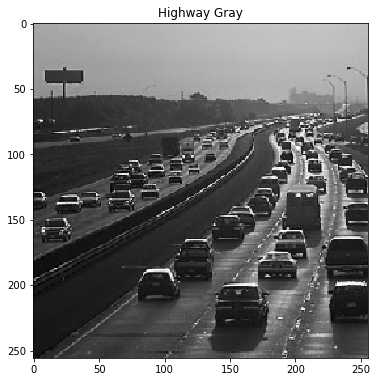

In [145]:
show_grayscale(highway_image_path, 'Highway Gray')

### Split Image into Red, Green and Blue channels

We would like to do this so that we can separate the colors channels so that we can operate on each channel differently.

Use **OpenCV** *split* method to split the image into 3 numpy arrays.

Using numpy we can operate on the arrays efficiently.

Function Name	Description
- np.sum	Compute sum of elements

- np.mean	Compute mean of elements

- np.std	Compute standard deviation

- np.var	Compute variance

- np.min	Find minimum value

- np.max	Find maximum value


In [146]:
# RECALL: OpenCV returns the image in Blue, Green, Red order NOT Red,Green,Blue
highway_image = cv2.imread(highway_image_path)
(B,G,R) = cv2.split(highway_image)

In [147]:
type(B)

numpy.ndarray

In [148]:
(R.mean(), G.mean(), B.mean())

(144.9398651123047, 78.62977600097656, 43.884429931640625)

In [149]:
(R.std(), G.std(), B.std())

(61.179201649610945, 58.56715675885695, 37.55190228847438)

In [150]:
(R.var(), G.var(), B.var())

(3742.8947144837584, 3430.1118508165237, 1410.1453654831275)

In [151]:
(R.min(), G.min(), B.min())

(27, 0, 0)

In [152]:
(R.max(), G.max(),B.max())

(255, 255, 237)

### Histogram

OpenCV calcHist method:


```calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```



In [153]:
import matplotlib.gridspec as gridspec
import numpy as np

def plot_rgb_histogram(img_path, setup_figure=True):
    image = cv2.imread(img_path)
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    if setup_figure:
        plt.figure(figsize=(6,8))
    plt.title("Color Histogram")
    plt.xlabel("pixel intensities")
    plt.ylabel("# of Pixels")
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])   
        
        

def get_normalized_image_histogram(img_path, mask=None):
    image = cv2.imread(img_path)

    hist = cv2.calcHist([image], [0, 1, 2],
                        mask, [8,8,8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)

    # return as a feature vector
    # the shape of the returned histogram is
    # 8*8*8 = 512 x 1 
    return hist.flatten()
    
def plot_image_histogram(img_path, setup_figure=True):
    bin_data = get_normalized_image_histogram(img_path)
    if setup_figure:
        plt.figure(figsize=(6,8))
    plt.title("Flattened Binned Color Histogram")
    plt.xlabel("Pixel Bins")
    plt.ylabel("Normalized ")
    plt.plot(bin_data, color = 'b')
    plt.xlim([0, 512])   
    
def image_summaries(img_paths, img_names, figsize=(20,10)):
    rows = len(img_paths)
    cols = 3
    cell = 1
    plt.figure(figsize=figsize)
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
    for i, img_path in enumerate(img_paths):
        plt.subplot(rows, cols, cell)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(img_names[i])

        cell = cell +1        
        plt.subplot(rows, cols, cell)
        plot_rgb_histogram(img_path, False)
        cell = cell + 1
        plt.subplot(rows, cols, cell )
        plot_image_histogram(img_path, False)
        cell = cell + 1

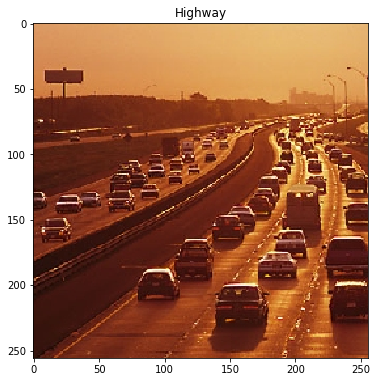

In [154]:
show_rgb(highway_image_path, 'Highway')

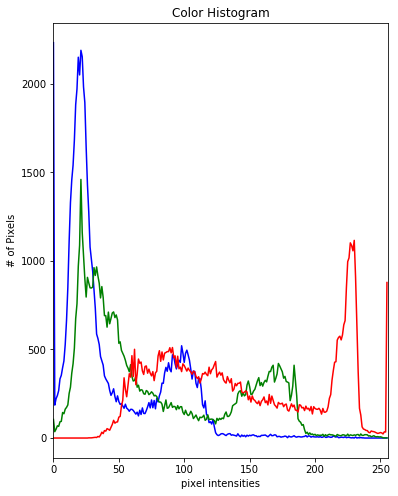

In [155]:
plot_rgb_histogram(highway_image_path)

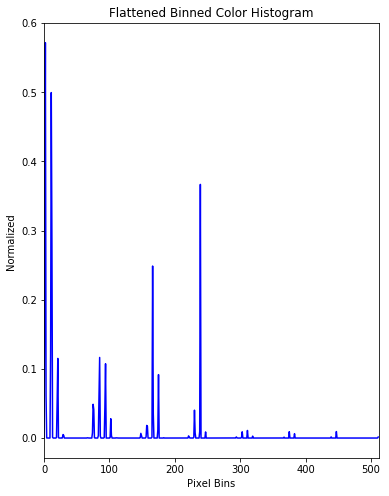

In [156]:
plot_image_histogram(highway_image_path)

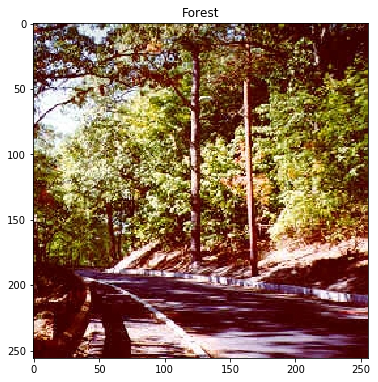

In [157]:
show_rgb(forest_image_path, 'Forest')

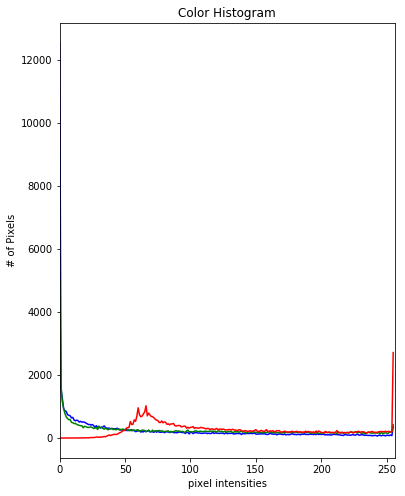

In [158]:
plot_rgb_histogram(forest_image_path)

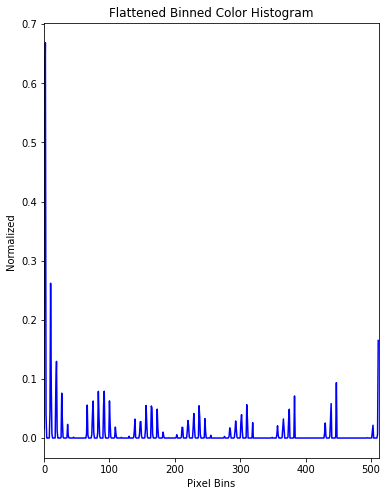

In [159]:
plot_image_histogram(forest_image_path)

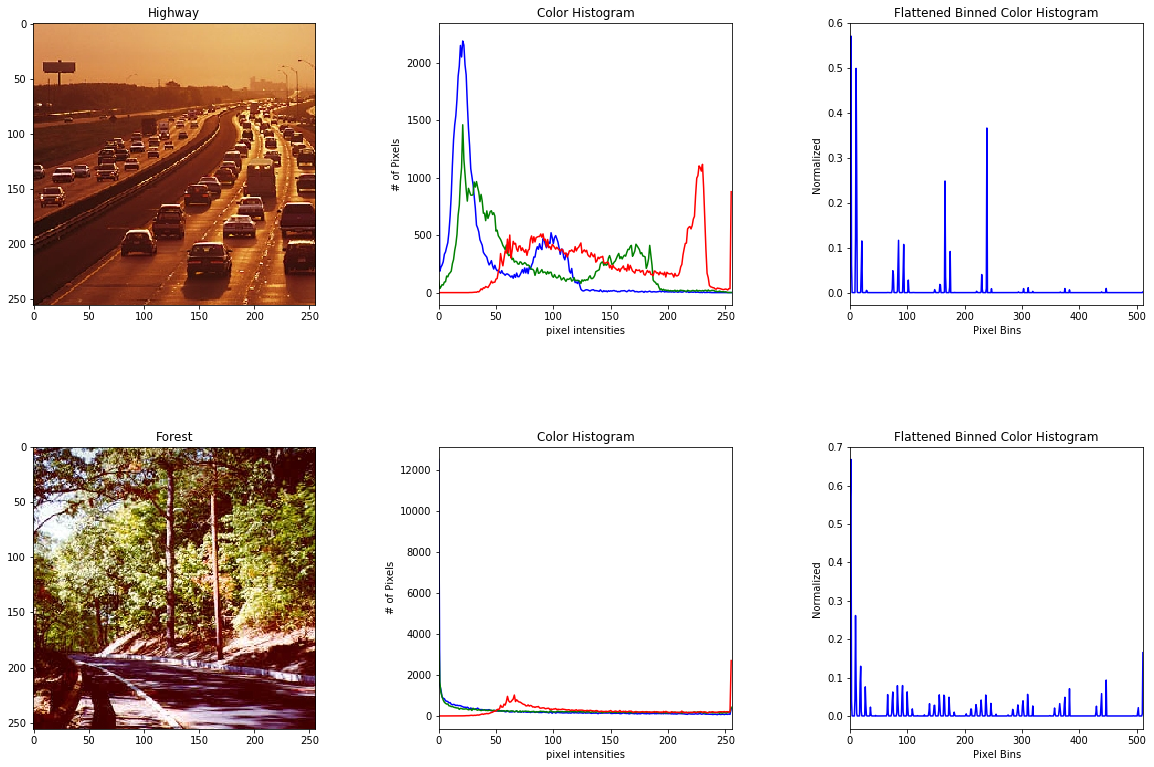

In [160]:
image_summaries([highway_image_path, forest_image_path], ['Highway', 'Forest'])

# 3Scenes Data Set

The data set is a 3 Scenes data set.

<table><tr><td>Coast</td><td>Highway</td><td>Forest</td></tr><tr>
<td> <img src="./notebook_images/coast_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/highway_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/forest_collage.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

We are going to extract features and train a number of models to determine the best model for the feature set.

In [161]:
image_dir = '3scenes'

# Features and Labels

### Features

The features used for this image classification will be:

- Mean Red

- Mean Green

- Mean Blue

- Standard Deviation Red

- Standard Deviation Blue

- Standard Deviation Green

- Image Histogram of 512 Values

In [162]:
# %load rgbhistogram.py
import cv2
import numpy as np

"""
This histogram will be used to charac- terize the color of the flower petals, 
which is a good starting point for classifying the species of a flower
"""


class RGBHistogram:

    def __init__(self, bins):
        self.bins = bins

    def get_features(self, imagePath):
        img = cv2.imread(imagePath)
        features = []
        features.extend(self.extract_color_stats(img))
        features.extend(self.describe(img).tolist())

        return features

    def extract_color_stats(self, image):
        # split the input image into its respective RGB color channels
        # and then create a feature vector with 6 values: the mean and
        # standard deviation for each of the 3 channels, respectively
        (B,G, R) = cv2.split(image)
        stats = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
                    np.std(G), np.std(B)]

        # return our set of features
        return stats

    def describe(self, image, mask=None):
        hist = cv2.calcHist([image], [0, 1, 2],
                            mask, self.bins, [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)

        # return as a feature vector
        return hist.flatten()



### Labels

Labels, meaning whether the image is a Cat, Dog, or Panda or Coast, Highway or Forest is derived from the directory structure.

### Load Image Features

In [163]:
from path_utils import list_images
from rgbhistogram import RGBHistogram
import os
import pandas as pd


def load_image_features(root_image_dir):
    imagePaths = list_images(root_image_dir)
    features = []
    image_labels = []

    rgbHisto = RGBHistogram([8, 8, 8])

    # loop over our input images
    for imagePath in imagePaths:
        cv2_features = rgbHisto.get_features(imagePath)
        features.append(cv2_features)

        # extract the class label from the file path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        image_labels.append(label)
        
    return features, image_labels


In [164]:
features, image_labels = load_image_features(image_dir)

In [165]:
features_df = pd.DataFrame(features)

In [166]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.552283,0.838468,1.000000,0.014579,0.000000,0.143475,0.359375,0.000000,0.000000,0.0,...,0.036522,0.000000,0.0,0.0,0.0,0.0,0.0,0.000537,0.046995,0.617376
1,1.000000,0.980283,0.590478,0.213402,0.000000,0.470903,0.082040,0.070538,0.005514,0.0,...,0.011788,0.003517,0.0,0.0,0.0,0.0,0.0,0.000380,0.001141,0.036695
2,1.000000,0.828714,0.425962,0.055243,0.030230,0.000000,0.029303,0.028165,0.000602,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000937,0.044489
3,0.631227,1.000000,0.000000,0.416268,0.344007,0.186664,0.392991,0.000362,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.001087,0.145809
4,1.000000,0.836345,0.724136,0.124246,0.069492,0.000000,0.038139,0.050419,0.002517,0.0,...,0.006712,0.003890,0.0,0.0,0.0,0.0,0.0,0.000000,0.001297,0.249426


In [167]:
labels_df = pd.DataFrame(image_labels)

In [168]:
labels_df.loc[::400]

,0
0,forest
400,highway
800,coast


## Convert String Labels to Numeric Labels

Machine learning algorithms generally have to work with numeric values.  Therefore we have to convert the labels of strings, 'cats', 'dogs', 'panda' to numbers.

This is what the *LabelEncoder* will do.


In [169]:
from sklearn.preprocessing import LabelEncoder
from more_itertools import unique_everseen

le = LabelEncoder()
labels = le.fit_transform(image_labels)

# return the list of unique classes/targets/labels
label_classes =  le.classes_
print(label_classes)
with open(f'./{image_dir}_scene_labels.txt', 'w') as f:
    for i, y in enumerate(label_classes):
        print(f"{i},{y}")
        f.write(f"{i},{y}")
        f.write("\n")


['coast' 'forest' 'highway']
0,coast
1,forest
2,highway


In [170]:
labels_df = pd.DataFrame(labels)
labels_df.loc[::400]

,0
0,1
400,2
800,0


In [171]:
X = features_df
y = labels

# Model Selection and Training

Using the Features 'X' and labels 'y', train a number of models and select the best one to use for the image classification.

Keep in mind that since we are using (Shallow) Machine Learning on color features only - the accuracy will be low.

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import os
from rgbhistogram import RGBHistogram
from sklearn.externals import joblib
from operator import itemgetter
from xgboost import XGBClassifier
import pandas as pd


In [173]:
models = {
    "knn":           KNeighborsClassifier(n_neighbors=3),
    "naive_bayes":   GaussianNB(),
    "logit":         LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm":           SVC(kernel="linear"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_leaf=4),
    "mlp2":          MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, alpha=0.0001,
                          solver='adam', verbose=10, tol=0.000000001),
    "mlp":           MLPClassifier(),
    "xgboost":       XGBClassifier(learning_rate=0.01)
}


Using Cross Validation to determine the best model to use based on the data we have to train with.

In [174]:
def cross_validate_model(model_name, X, y):
    # train the model
    # print("[INFO] using '{}' model".format(args["model"]))
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=3)
    accuracy = scores.mean()
    return model_name, accuracy, model


In [175]:
model_name = 'all'

In [176]:
results = []
best_model = None
if model_name == 'all':
    for k, v in models.items():
        results.append(cross_validate_model(k, X, y))
        for r in results:
            print(r)

    results.sort(key=itemgetter(1))
    print(f"Best Model: {results[-1]}")
    best_model = results[-1][2] # 0-model name, 1-accuracy, 2-model
    best_accuracy = results[-1][1]

else:
    model_name, best_accuracy, model = cross_validate_model(model_name, X, y)
    best_model = model
    print(model_name, accuracy)
    saved_model_name = f"{image_dir}_image_classify_scikit_model.sav"
    joblib.dump(model, saved_model_name)
    print(f"Saving model to: {saved_model_name}")



('knn', 0.824286802828143, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('knn', 0.824286802828143, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('naive_bayes', 0.6304690436398176, GaussianNB(priors=None, var_smoothing=1e-09))
('knn', 0.824286802828143, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('naive_bayes', 0.6304690436398176, GaussianNB(priors=None, var_smoothing=1e-09))
('logit', 0.8327895683744161, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
       

Iteration 117, loss = 0.17638557
Iteration 118, loss = 0.17525578
Iteration 119, loss = 0.17388142
Iteration 120, loss = 0.17500387
Iteration 121, loss = 0.17597503
Iteration 122, loss = 0.17414583
Iteration 123, loss = 0.17136633
Iteration 124, loss = 0.16954641
Iteration 125, loss = 0.17032329
Iteration 126, loss = 0.16827064
Iteration 127, loss = 0.16631492
Iteration 128, loss = 0.16592149
Iteration 129, loss = 0.16574119
Iteration 130, loss = 0.16370894
Iteration 131, loss = 0.16284249
Iteration 132, loss = 0.16631301
Iteration 133, loss = 0.16624573
Iteration 134, loss = 0.16054955
Iteration 135, loss = 0.15875452
Iteration 136, loss = 0.15901777
Iteration 137, loss = 0.15750703
Iteration 138, loss = 0.15578534
Iteration 139, loss = 0.15497152
Iteration 140, loss = 0.15350305
Iteration 141, loss = 0.15293401
Iteration 142, loss = 0.15286094
Iteration 143, loss = 0.15417234
Iteration 144, loss = 0.15244652
Iteration 145, loss = 0.15020071
Iteration 146, loss = 0.15009916
Iteration 

Iteration 380, loss = 0.04251533
Iteration 381, loss = 0.04250756
Iteration 382, loss = 0.04222423
Iteration 383, loss = 0.04176966
Iteration 384, loss = 0.04210314
Iteration 385, loss = 0.04192842
Iteration 386, loss = 0.04148468
Iteration 387, loss = 0.04120077
Iteration 388, loss = 0.04134677
Iteration 389, loss = 0.04093009
Iteration 390, loss = 0.04100102
Iteration 391, loss = 0.04152742
Iteration 392, loss = 0.04048877
Iteration 393, loss = 0.03999248
Iteration 394, loss = 0.04050751
Iteration 395, loss = 0.04014570
Iteration 396, loss = 0.03928101
Iteration 397, loss = 0.03910824
Iteration 398, loss = 0.03945881
Iteration 399, loss = 0.03849061
Iteration 400, loss = 0.03845017
Iteration 401, loss = 0.03864380
Iteration 402, loss = 0.03828766
Iteration 403, loss = 0.03790040
Iteration 404, loss = 0.03755826
Iteration 405, loss = 0.03743714
Iteration 406, loss = 0.03738159
Iteration 407, loss = 0.03727796
Iteration 408, loss = 0.03708141
Iteration 409, loss = 0.03662281
Iteration 

/Users/patrickryan/Development/python/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 25, loss = 0.40610432
Iteration 26, loss = 0.39778056
Iteration 27, loss = 0.39036824
Iteration 28, loss = 0.38368326
Iteration 29, loss = 0.37699736
Iteration 30, loss = 0.37094422
Iteration 31, loss = 0.36593355
Iteration 32, loss = 0.36079654
Iteration 33, loss = 0.35474837
Iteration 34, loss = 0.34947201
Iteration 35, loss = 0.34616993
Iteration 36, loss = 0.34189384
Iteration 37, loss = 0.33696481
Iteration 38, loss = 0.33202544
Iteration 39, loss = 0.32893687
Iteration 40, loss = 0.32375718
Iteration 41, loss = 0.31954648
Iteration 42, loss = 0.31596099
Iteration 43, loss = 0.31406336
Iteration 44, loss = 0.30929084
Iteration 45, loss = 0.30633664
Iteration 46, loss = 0.30498653
Iteration 47, loss = 0.30209899
Iteration 48, loss = 0.29756723
Iteration 49, loss = 0.29270330
Iteration 50, loss = 0.28937561
Iteration 51, loss = 0.28622347
Iteration 52, loss = 0.28383075
Iteration 53, loss = 0.28098019
Iteration 54, loss = 0.27808439
Iteration 55, loss = 0.27563335
Iteratio

Iteration 288, loss = 0.07231146
Iteration 289, loss = 0.07105742
Iteration 290, loss = 0.07112122
Iteration 291, loss = 0.07234990
Iteration 292, loss = 0.07081491
Iteration 293, loss = 0.06916767
Iteration 294, loss = 0.06911321
Iteration 295, loss = 0.06896841
Iteration 296, loss = 0.06849495
Iteration 297, loss = 0.06799618
Iteration 298, loss = 0.06740671
Iteration 299, loss = 0.06687608
Iteration 300, loss = 0.06624970
Iteration 301, loss = 0.06599077
Iteration 302, loss = 0.06583503
Iteration 303, loss = 0.06560309
Iteration 304, loss = 0.06513903
Iteration 305, loss = 0.06475903
Iteration 306, loss = 0.06417222
Iteration 307, loss = 0.06371076
Iteration 308, loss = 0.06404142
Iteration 309, loss = 0.06369019
Iteration 310, loss = 0.06271727
Iteration 311, loss = 0.06208631
Iteration 312, loss = 0.06276816
Iteration 313, loss = 0.06511906
Iteration 314, loss = 0.06259420
Iteration 315, loss = 0.06200926
Iteration 316, loss = 0.06274936
Iteration 317, loss = 0.06132512
Iteration 

/Users/patrickryan/Development/python/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 18, loss = 0.50331801
Iteration 19, loss = 0.48775380
Iteration 20, loss = 0.47446969
Iteration 21, loss = 0.46320413
Iteration 22, loss = 0.45216131
Iteration 23, loss = 0.44190403
Iteration 24, loss = 0.43258235
Iteration 25, loss = 0.42323388
Iteration 26, loss = 0.41643852
Iteration 27, loss = 0.40950377
Iteration 28, loss = 0.40275378
Iteration 29, loss = 0.39592170
Iteration 30, loss = 0.38844798
Iteration 31, loss = 0.38155953
Iteration 32, loss = 0.37567347
Iteration 33, loss = 0.37029502
Iteration 34, loss = 0.36587705
Iteration 35, loss = 0.35962544
Iteration 36, loss = 0.35401069
Iteration 37, loss = 0.34900577
Iteration 38, loss = 0.34380245
Iteration 39, loss = 0.33906267
Iteration 40, loss = 0.33473521
Iteration 41, loss = 0.32979409
Iteration 42, loss = 0.32601685
Iteration 43, loss = 0.32163419
Iteration 44, loss = 0.31763741
Iteration 45, loss = 0.31316424
Iteration 46, loss = 0.31007125
Iteration 47, loss = 0.30663922
Iteration 48, loss = 0.30228072
Iteratio

Iteration 275, loss = 0.06148034
Iteration 276, loss = 0.06199606
Iteration 277, loss = 0.06201488
Iteration 278, loss = 0.06180988
Iteration 279, loss = 0.06083402
Iteration 280, loss = 0.06005500
Iteration 281, loss = 0.06016323
Iteration 282, loss = 0.05958091
Iteration 283, loss = 0.05883226
Iteration 284, loss = 0.05826153
Iteration 285, loss = 0.05797968
Iteration 286, loss = 0.05781130
Iteration 287, loss = 0.05719416
Iteration 288, loss = 0.05674918
Iteration 289, loss = 0.05633117
Iteration 290, loss = 0.05646263
Iteration 291, loss = 0.05582333
Iteration 292, loss = 0.05526052
Iteration 293, loss = 0.05571503
Iteration 294, loss = 0.05450338
Iteration 295, loss = 0.05501265
Iteration 296, loss = 0.05539174
Iteration 297, loss = 0.05418665
Iteration 298, loss = 0.05370346
Iteration 299, loss = 0.05351426
Iteration 300, loss = 0.05270674
Iteration 301, loss = 0.05224914
Iteration 302, loss = 0.05214468
Iteration 303, loss = 0.05170109
Iteration 304, loss = 0.05116919
Iteration 

/Users/patrickryan/Development/python/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


('knn', 0.824286802828143, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('naive_bayes', 0.6304690436398176, GaussianNB(priors=None, var_smoothing=1e-09))
('logit', 0.8327895683744161, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))
('svm', 0.8594205066982381, SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))
('decision_tree', 0.77637332883207, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=N

/Users/patrickryan/Development/python/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/patrickryan/Development/python/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/patrickryan/Development/python/mygithub/pyimagesearch-python-machine-learning/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


('knn', 0.824286802828143, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
('naive_bayes', 0.6304690436398176, GaussianNB(priors=None, var_smoothing=1e-09))
('logit', 0.8327895683744161, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))
('svm', 0.8594205066982381, SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))
('decision_tree', 0.77637332883207, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=N

In [177]:
for model_result in results:
    print(f"{model_result[0]}\t {model_result[1]}")

"""
Model accuracy before applying min/max scaling on mean and standard deviation in colors
naive_bayes	 0.6251951040238825
knn	 0.697419095966134
logit	 0.7283472362886702
decision_tree	 0.7560333321332283
xgboost	 0.7976385586426082
svm	 0.8007892473028511
mlp	 0.803967112253472
random_forest	 0.8039942233207532
mlp2	 0.8157634267832473
"""

naive_bayes	 0.6304690436398176
decision_tree	 0.77637332883207
knn	 0.824286802828143
xgboost	 0.8306629258176846
logit	 0.8327895683744161
random_forest	 0.8433983442377655
mlp	 0.8434153457250261
mlp2	 0.850876976716398
svm	 0.8594205066982381


'\nModel accuracy before applying min/max scaling on mean and standard deviation in colors\nnaive_bayes\t 0.6251951040238825\nknn\t 0.697419095966134\nlogit\t 0.7283472362886702\ndecision_tree\t 0.7560333321332283\nxgboost\t 0.7976385586426082\nsvm\t 0.8007892473028511\nmlp\t 0.803967112253472\nrandom_forest\t 0.8039942233207532\nmlp2\t 0.8157634267832473\n'

In [178]:
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Model: {best_model}")

Best Accuracy: 0.8594205066982381
Best Model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Use the best model to fit ( Train the model on the data ) the model so it will be ready to make predictions.

In [179]:
best_model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Select the best model based on Accuracy to use for the model execution.

Keep in mind that we use *train_test_split* which takes one random select of data. If we ran, *cross_val_score*, this would be better representation of the model performance.

# Model Execution

In [180]:
rgbHisto = RGBHistogram([8, 8, 8])

In [181]:
if image_dir == '3scenes':
    test_images = [
            './3scenes_holdout/forest/forest_for15.jpg',
            './3scenes_holdout/forest/forest_nat982.jpg',
            './3scenes_holdout/coast/coast_cdmc922.jpg',
            './3scenes_holdout/coast/coast_n291061.jpg',
            './3scenes_holdout/highway/highway_art820.jpg',
            './3scenes_holdout/highway/highway_urb537.jpg'
        ]
    test_images_names = [
        'Forest',
        'Forest',
        'Coast',
        'Coast',
        'Highway',
        'Highway'
    ]
    
elif image_dir == 'animals':
    test_images = [
            './animal_holdout/cats/cats_00843.jpg',
            './animal_holdout/cats/cats_00997.jpg',
            './animal_holdout/dogs/dogs_00102.jpg',
            './animal_holdout/dogs/dogs_00163.jpg',
            './animal_holdout/pandas/panda_00050.jpg',
            './animal_holdout/pandas/panda_00755.jpg'
        ]
    test_images_names = [
        'Cat',
        'Cat',
        'Dog',
        'Dog',
        'Panda',
        'Panda'
    ]

else:
    print("Error in specifying training directory")

In [182]:
def predict_image(imagePath, model):
    print(f'Predict for image: {imagePath}')
    features = rgbHisto.get_features(imagePath)
    prediction = model.predict([features])

    print(f'Image: {imagePath}')
    print(f'Prediction: {prediction}')
    print(f'Targets: {label_classes[prediction[0]]}')
    return label_classes[prediction[0]]


In [183]:
test_image_names_predictions = []
for i, test_image in enumerate(test_images):
    print(f"-----------------------------")
    predicted_label = predict_image(test_image, best_model)
    test_image_names_predictions.append(f'{test_images_names[i]}-{predicted_label}')


-----------------------------
Predict for image: ./3scenes_holdout/forest/forest_for15.jpg
Image: ./3scenes_holdout/forest/forest_for15.jpg
Prediction: [1]
Targets: forest
-----------------------------
Predict for image: ./3scenes_holdout/forest/forest_nat982.jpg
Image: ./3scenes_holdout/forest/forest_nat982.jpg
Prediction: [1]
Targets: forest
-----------------------------
Predict for image: ./3scenes_holdout/coast/coast_cdmc922.jpg
Image: ./3scenes_holdout/coast/coast_cdmc922.jpg
Prediction: [2]
Targets: highway
-----------------------------
Predict for image: ./3scenes_holdout/coast/coast_n291061.jpg
Image: ./3scenes_holdout/coast/coast_n291061.jpg
Prediction: [0]
Targets: coast
-----------------------------
Predict for image: ./3scenes_holdout/highway/highway_art820.jpg
Image: ./3scenes_holdout/highway/highway_art820.jpg
Prediction: [1]
Targets: forest
-----------------------------
Predict for image: ./3scenes_holdout/highway/highway_urb537.jpg
Image: ./3scenes_holdout/highway/highw

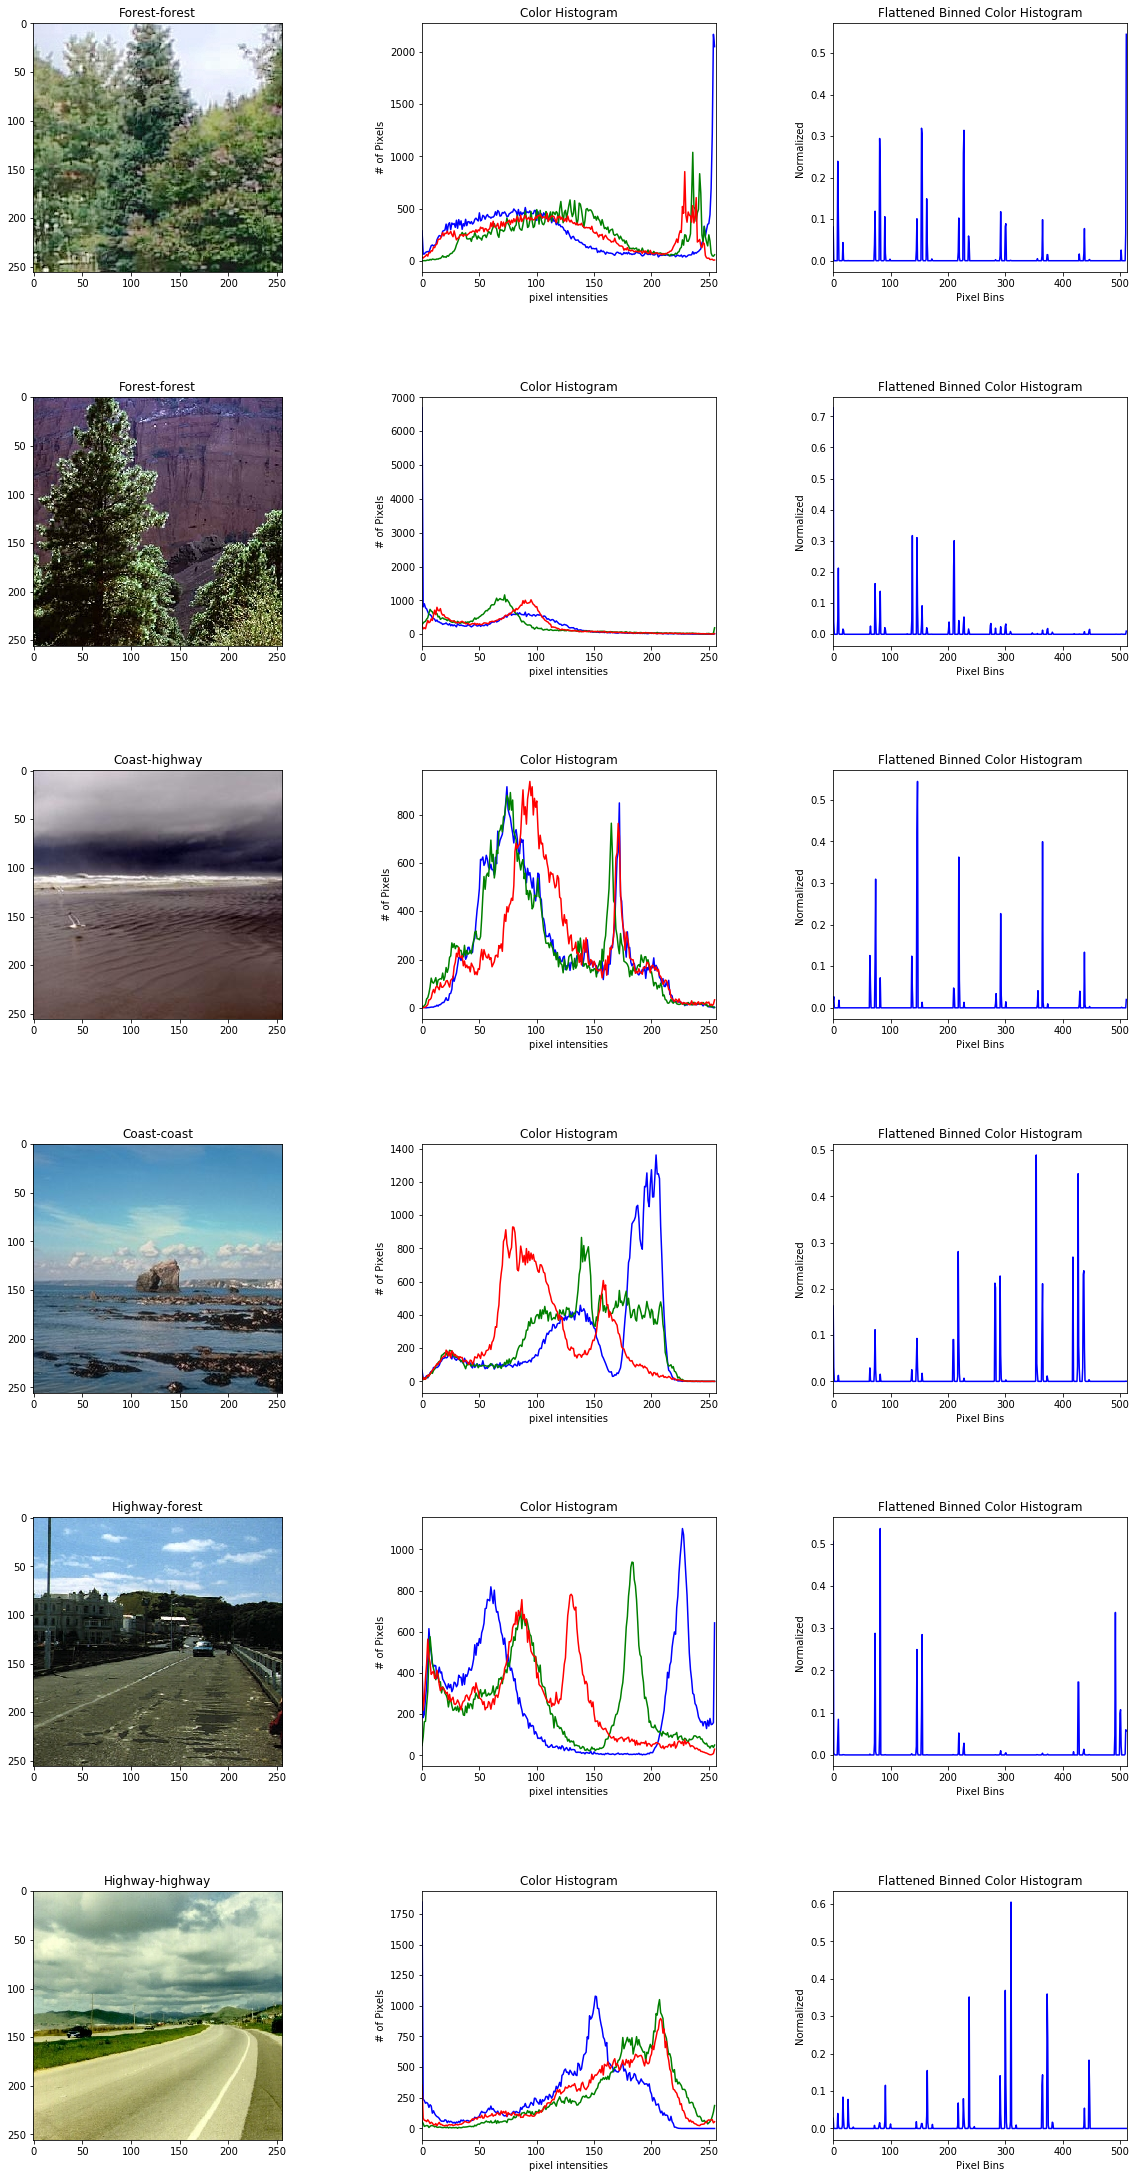

In [184]:
image_summaries(test_images, test_image_names_predictions, (20,30))

## Animals DataSet Summary

Running the same notebook on the image_dir='animals' produced different results.  

As you would expect, the performance is highly depending upon the training data and features we are using to train the models.  For the Cat, Dog, Panda dataset the results were:

```
Best Accuracy: 0.701053463101656
Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
```

And of the 6 animal hold out pictures, it only predicted 50% of those accurately.

This is where we will look at Deep Learning techiques to see if we can improve this

# Summary

This notebook attempted to demonstrate Machine Learning techniques using image classification as the problem.

The goals of this notebook were:

- Gentle introduction to Computer Vision and image processing

- How to look for features in data that are perhaps un-obvious at first

- How to use OpenCV to create a feature set

- Present a high level overview of a number of Scikit-Learn Machine Learning models

- Demonstrate the steps to creating a Machine Learning model

- Demonstrate how to predict using a Machine Learning Model

- Setup the next discussion on Deep Learning and Image Classification.


It was meant to show how to extract features and apply these features to machine learning models.

We saw about an 81% accuracy for this dataset.  This will vary depending upon the dataset, and in general 81% is not thought of as very good.  

This is because just looking at colors is not a great way to classify images.  However, (Shallow) Machine Learning still does a great job with other data sets and should be the first set of models you try when attempting to use Machine Learning.

In the next notebook, we will look at Deep Learning Neural Networks and to see if we can construct Machine Learning models that can do a better job of classifying.

